<a href="https://colab.research.google.com/github/riscosnap/FIFA-22--k-means-clustering-algorithm-from-scratch-python-pandas-only-not-directly-scikit-/blob/main/FIFA_22_k_means_clustering_algorithm_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
players = pd.read_csv("players_22.csv")

<ipython-input-6-08b1a8bf1ee9>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


In [ ]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [ ]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [ ]:
players = players.dropna(subset=features) #drop null w subsetas features we care about.

In [ ]:
data = players[features].copy()   #here we learn to differentiate between data and players where datais the new data and players are allfeatures inclusive.

In [ ]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


# Pseudocode -ou walkthrough of creation of our hands on k mean algorith



1. Scale data to standardize values
2. Initialize random centroids
3. Get labels for each data point
4. Create new centroids
5. Plot the centroids
6. Repeat 3-5 until the centroids stop changing

# Scaling our data

In [ ]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [ ]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [ ]:
data.head() # so as we can szee we have scaled down our data ffrom range 1 t0 10only,no domination.

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185


# Initializing Random-ass * Centroids

In [ ]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [ ]:
centroids = random_centroids(data, 5)

In [ ]:
centroids

,0,1,2,3,4
overall,3.826087,6.000000,6.434783,7.739130,5.347826
potential,5.782609,5.130435,4.260870,3.826087,4.913043
wage_eur,1.128755,1.042918,1.000000,1.185980,1.010014
value_eur,1.082014,1.082014,1.102634,1.034331,1.035620
age,3.962963,5.074074,5.074074,6.185185,4.333333


# Getting labels or Initializing Centroid assignments to data using #euclidean distance.

In [ ]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1))) #calculating euclidean distances
    return distances.idxmin(axis=1)                                               #Clusterassignments at axis 1

In [ ]:
labels = get_labels(data, centroids)

In [ ]:
labels.value_counts() #count the no of players(values)in each cluster

1    7715
0    7475
4    3505
3     412
2      58
dtype: int64

# Updating of centroids w new_function! and iteration! using #geometric mean.

In [ ]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [ ]:
from sklearn.decomposition import PCA #now we are gonna visulaize and iterate.
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

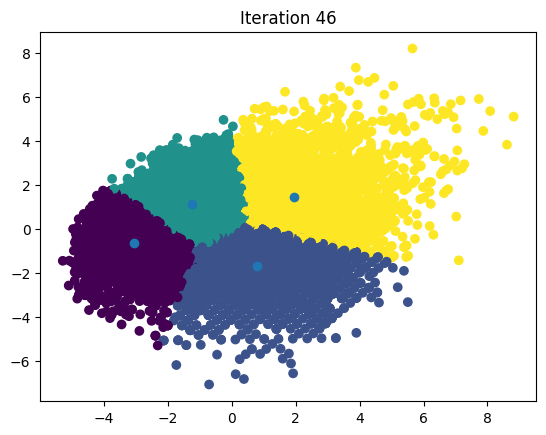

In [ ]:
max_iterations = 100
centroid_count = 5

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [ ]:
centroids

,0,1,2,4
overall,2.745324,5.041269,4.672948,7.001319
potential,4.641464,4.740596,6.372118,7.122450
wage_eur,1.019057,1.097148,1.081848,1.673941
value_eur,1.014874,1.039326,1.069553,1.405251
age,2.633779,5.921189,2.884023,4.820373


In [ ]:
labels.value_counts() #after updating

1    6360
2    5675
4    4214
0    2916
dtype: int64

In [ ]:
players[labels == 0][["short_name"] + features] #SO ,  how cool is this we can just check clusters like this. btw label==0 means we checking in cluster0

,short_name,overall,potential,wage_eur,value_eur,age
11593,Raphael Doninho,64,64,5000.0,700000.0,21
12250,D. Ferdiz,63,63,500.0,500000.0,21
12643,B. Miranda,63,65,500.0,625000.0,23
12871,M. Collao,63,65,900.0,625000.0,23
13552,S. Matthews,62,66,2000.0,575000.0,24
...,...,...,...,...,...,...
19234,Song Defu,47,52,1000.0,70000.0,22
19235,C. Porter,47,59,500.0,110000.0,19
19236,N. Logue,47,55,500.0,100000.0,21
19237,L. Rudden,47,60,500.0,110000.0,19


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(5)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2,3,4
overall,5.356676,6.234314,4.609636,7.765036,3.203318
potential,6.657045,5.834894,4.413949,8.001255,5.265288
wage_eur,1.162501,1.312215,1.058912,2.429739,1.023536
value_eur,1.105133,1.101514,1.030954,2.016966,1.021212
age,3.363662,6.627790,5.497099,4.669124,2.619053
